### Aprendizaje de maquina Supervisado

Dataset: Wine dataset
Enunciado: Crear un modelo supervisado para pronosticar a que clase pertenece un vino

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from distfit import distfit

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [4]:
np.set_printoptions(suppress=True)

In [5]:
import warnings
#warnings.filterwarnings('ignore')

In [6]:
datos_vinos = load_wine()
#print(datos_vinos['DESCR'])

In [7]:
df = pd.DataFrame(datos_vinos.data)
df['objetivo'] = datos_vinos.target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,objetivo
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# clases objetivo
df.objetivo.value_counts()

1    71
0    59
2    48
Name: objetivo, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         178 non-null    float64
 1   1         178 non-null    float64
 2   2         178 non-null    float64
 3   3         178 non-null    float64
 4   4         178 non-null    float64
 5   5         178 non-null    float64
 6   6         178 non-null    float64
 7   7         178 non-null    float64
 8   8         178 non-null    float64
 9   9         178 non-null    float64
 10  10        178 non-null    float64
 11  11        178 non-null    float64
 12  12        178 non-null    float64
 13  objetivo  178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [10]:
# Verificar valores null
df.isnull().values.any()

False

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,objetivo
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


- Se observan valores maximos en un amplio rango de variacion, por ejemplo en la variable 7 respecto de la variable 12. Se recomienda escalar los datos.

In [12]:
# test de normalidad
cols = df.drop('objetivo', axis=1)
print('    solo se muestran las variables de comportamiento normal   ')
for var in cols:
    stat, p = stats.normaltest(df[var])
    # interpretacion
    alpha = 1e-3
    if p > alpha:
        print('var=', var)
        print('stat = %.3f, p = %g,  normal distribution, H0 no se rechaza' % (stat, p))

    solo se muestran las variables de comportamiento normal   
var= 2
stat = 6.631, p = 0.036316,  normal distribution, H0 no se rechaza
var= 3
stat = 3.121, p = 0.210043,  normal distribution, H0 no se rechaza
var= 7
stat = 11.855, p = 0.0026647,  normal distribution, H0 no se rechaza
var= 8
stat = 9.656, p = 0.00800081,  normal distribution, H0 no se rechaza
var= 10
stat = 1.039, p = 0.594729,  normal distribution, H0 no se rechaza


- 5 de las 13 variables presentan distribucion tipo normal

[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..


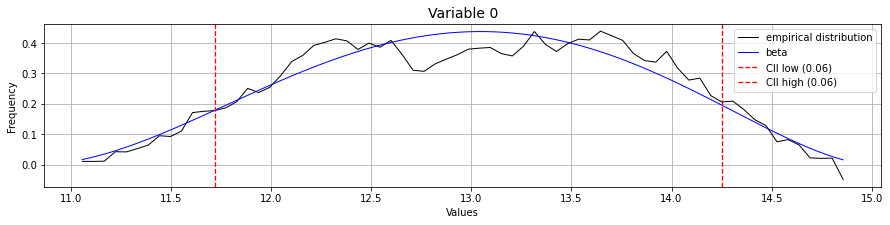

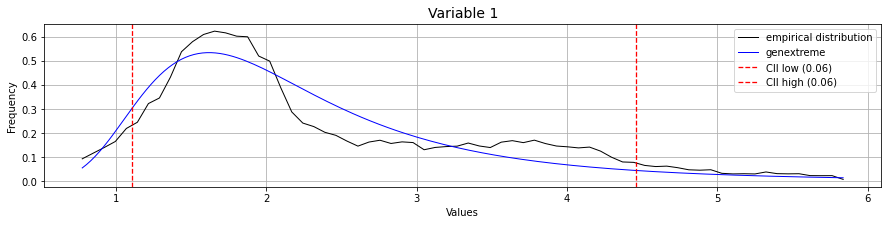

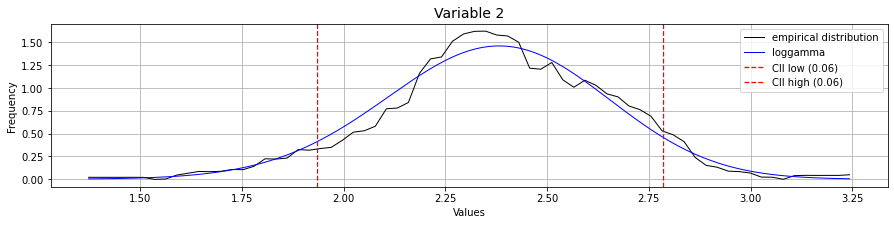

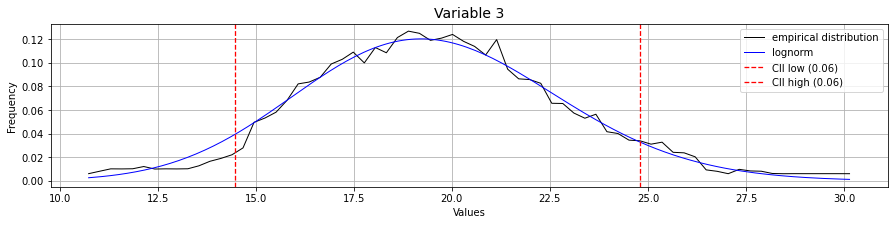

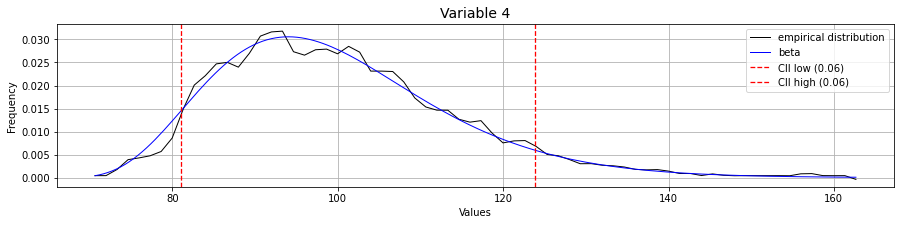

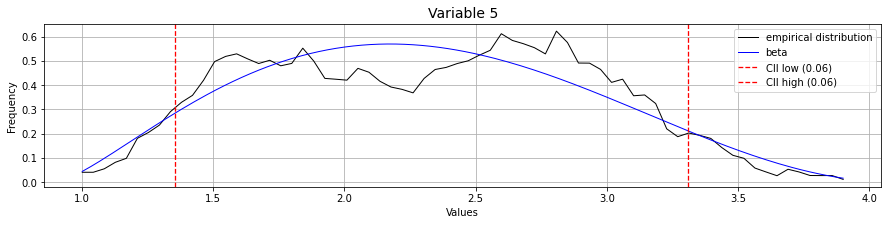

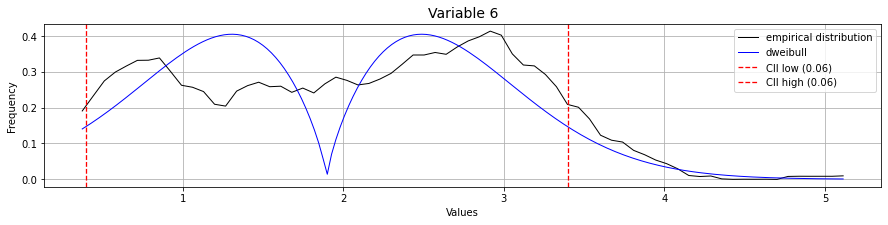

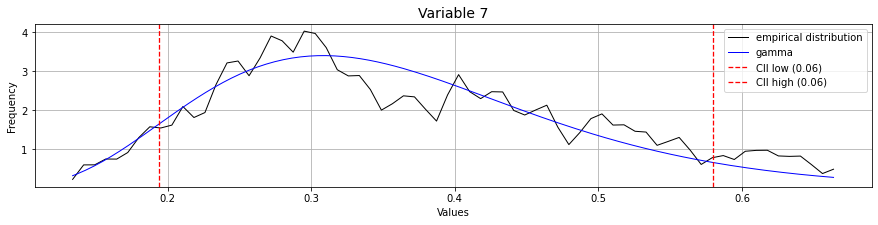

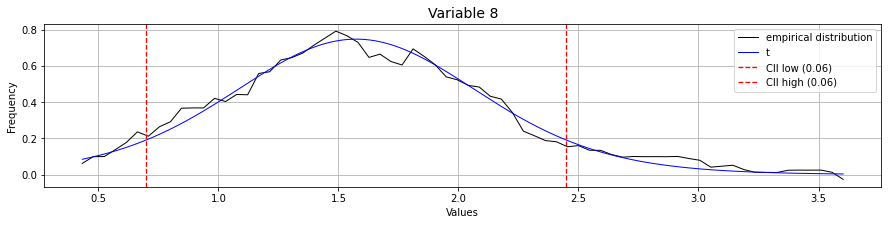

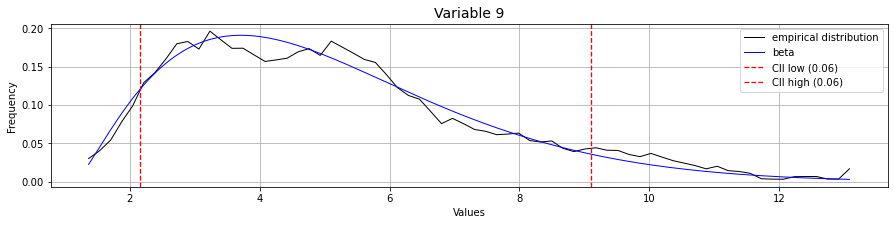

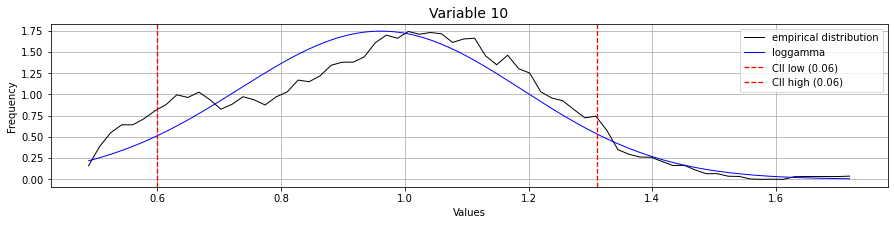

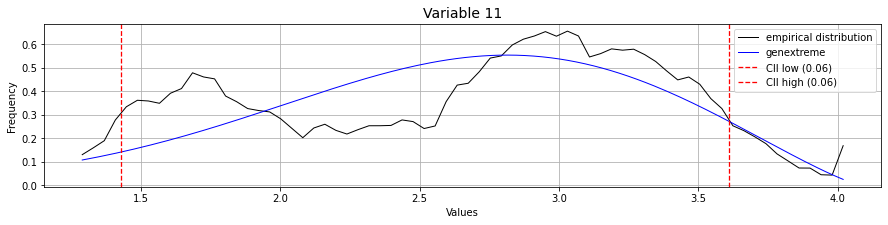

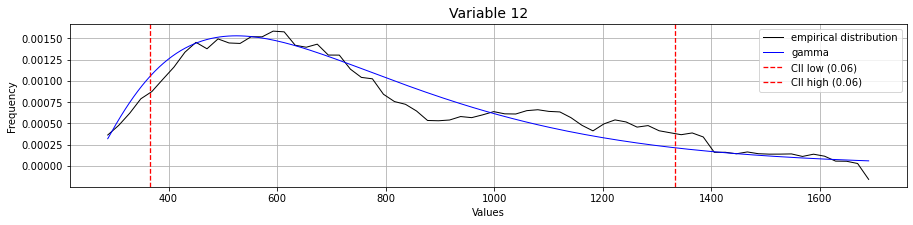

In [13]:
# identificacion de distribuciones con distfit
distType={'variable':[], 'distribucion':[]}
cols = df.drop('objetivo', axis=1)
for var in cols: 
    dist = distfit(smooth=10, bins=70,alpha=0.06,stats='RSS')
    dist.fit_transform(df[var], verbose=0)
    distType['variable'].append(var)
    distType['distribucion'].append(dist.model['name'])  
    dist.plot(figsize=(15,3));
    plt.title('Variable {}'.format(var), size=14);

In [14]:
pd.DataFrame(distType)

,variable,distribucion
0,0,beta
1,1,genextreme
2,2,loggamma
3,3,lognorm
4,4,beta
5,5,beta
6,6,dweibull
7,7,gamma
8,8,t
9,9,beta


- Los resultados entre normaltest y distfit son de mas o menos similares, sin embargo bastante sensible en distfit a hiperparametros

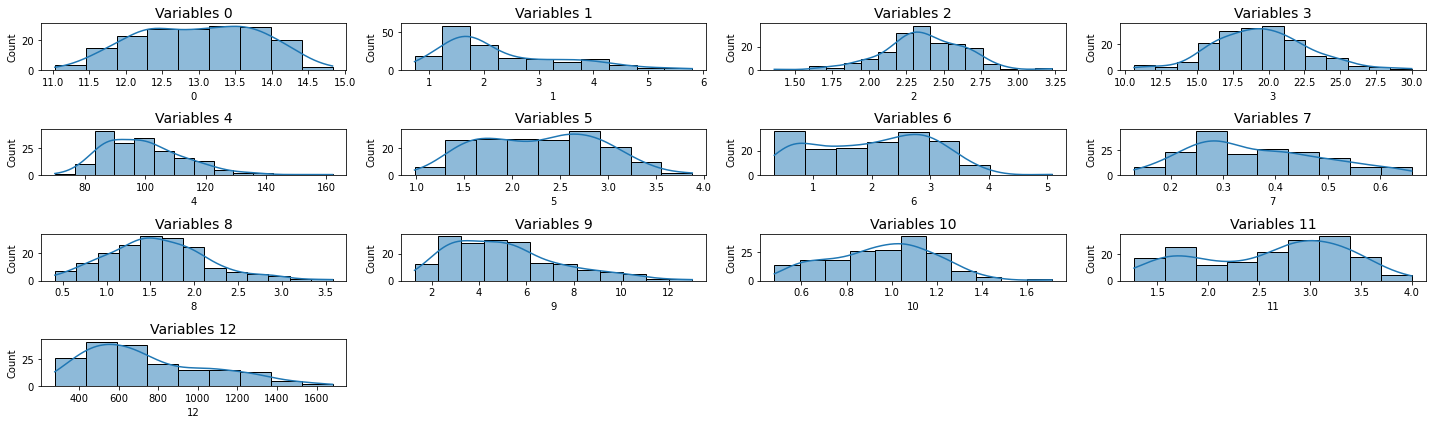

In [15]:
# Histogramas (datos raw)
cols = df.drop('objetivo', axis=1)
plt.figure(figsize=(20, 6))
i=0
for var in cols: 
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=i, legend=True, kde=True)
    plt.title('Variables {}'.format(i), size=14)
    plt.tight_layout();
    i+=1

- variable 11 presenta 2 modas 

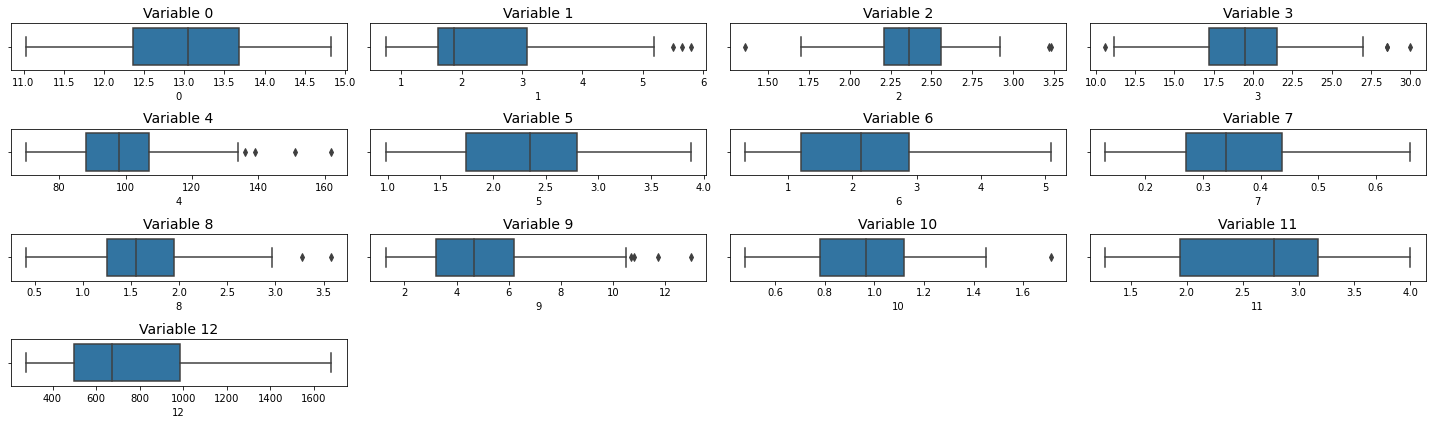

In [16]:
# BoxPlot - valores estadisticos y datos atipicos  (datos raw)
cols = df.drop('objetivo', axis=1)
plt.figure(figsize = (20, 6));
i=1
for var in cols: 
    plt.subplot(4,4,i)
    plt.title('Variable {}'.format(var), size=14)
    sns.boxplot(data=df, x=var)
    plt.tight_layout();
    i+=1

In [17]:
# Funcion de calculo quantiles, Q1, Q3 y valores limites
def quantilQ1Q3(data): 
    Q1 = data.quantile(q=0.25)
    Q3 = data.quantile(q=0.75)
    IQR=Q3-Q1
    minlimit= Q1 - 1.5 * IQR
    maxlimit= Q3 + 1.5 * IQR 
    return minlimit, maxlimit

In [18]:
# DataFrame valores limites
cols = df.drop('objetivo', axis=1).copy()
lms={'variable':[],'minlimit':[], 'maxlimit':[]}
def remOutliers(cols):
    for var in cols:
        minlimit, maxlimit=quantilQ1Q3(df[var])
        lms['variable'].append(var)
        lms['minlimit'].append(minlimit)
        lms['maxlimit'].append(maxlimit)
    return lms

In [19]:
lms=remOutliers(cols)
limits=pd.DataFrame(lms)
limits

,variable,minlimit,maxlimit
0,0,10.39000,15.65000
1,1,-0.61750,5.30250
2,2,1.68875,3.07875
3,3,10.75000,27.95000
4,4,59.50000,135.50000
5,5,0.15625,4.38625
6,6,-1.30000,5.38000
7,7,0.01875,0.68875
8,8,0.20000,3.00000
9,9,-1.25000,10.67000


In [20]:
# remove outliers
cols = df.drop('objetivo', axis=1).copy()
df_outliers=pd.DataFrame()
for var in cols:
    temp=df[var][(df[var]>limits['minlimit'][var]) & (df[var]<limits['maxlimit'][var])]
    df_outliers=pd.concat([df_outliers, temp], axis=1)

In [21]:
df_outliers['objetivo'] = datos_vinos.target
df_outliers.isnull().sum()

0           0
1           3
2           3
3           4
4           4
5           0
6           0
7           0
8           2
9           4
10          1
11          0
12          0
objetivo    0
dtype: int64

In [22]:
df_outliers.dropna(inplace=True)
df_outliers.isnull().any().sum()

0

In [23]:
# Escalar datos MinMaxScaler
cols = df_outliers.drop('objetivo', axis=1).copy()
# Construcion de escalador
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler = scaler.fit(cols.values)
# Escalamiento de los valores
norma = scaler.transform(cols.values)
df_mms = pd.DataFrame(norma, index=cols.index, columns=cols.columns)
df_mms['objetivo'] = df_outliers['objetivo'].copy()
df_mms.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,objetivo
0,0.824561,0.217978,0.598361,0.278481,0.890625,0.627586,0.757660,0.283019,0.737255,0.471861,0.549451,0.970696,0.561341,0
1,0.523392,0.233708,0.360656,0.000000,0.468750,0.575862,0.674095,0.245283,0.341176,0.335498,0.560440,0.780220,0.550642,0
2,0.511696,0.364045,0.795082,0.468354,0.484375,0.627586,0.807799,0.320755,0.941176,0.476190,0.538462,0.695971,0.646933,0
3,0.865497,0.271910,0.655738,0.354430,0.671875,0.989655,0.877437,0.207547,0.694118,0.705628,0.351648,0.798535,0.857347,0
4,0.535088,0.415730,0.959016,0.620253,0.750000,0.627586,0.654596,0.490566,0.552941,0.329004,0.549451,0.608059,0.325963,0


In [24]:
# Escalar datos StandardScaler
cols = df_outliers.drop('objetivo', axis=1).copy()
# Construcion de escalador
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = scaler.fit(cols.values)
# Escalamiento de los valores
norma = scaler.transform(cols.values)
df_sscal = pd.DataFrame(norma, index=cols.index, columns=cols.columns)
df_sscal['objetivo'] = df_outliers['objetivo'].copy()
df_sscal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,objetivo
0,1.495711,-0.571130,0.277425,-1.208619,2.309259,0.808420,1.034224,-0.643463,1.415284,0.296494,0.372149,1.826678,0.947436,0
1,0.200698,-0.504145,-0.928625,-2.672685,0.118914,0.570475,0.728906,-0.808165,-0.511374,-0.300438,0.418153,1.091015,0.900976,0
2,0.150407,0.050878,1.275535,-0.210392,0.200038,0.808420,1.217414,-0.478761,2.407227,0.315445,0.326144,0.765626,1.319115,0
3,1.671732,-0.341465,0.568540,-0.809329,1.173525,2.474030,1.471845,-0.972867,1.205450,1.319806,-0.455928,1.161752,2.232826,0
4,0.250990,0.270973,2.107293,0.588189,1.579144,0.808420,0.657665,0.262398,0.518720,-0.328863,0.372149,0.426090,-0.074682,0


- Se recomienda MaxMinScaler para distribuciones no normales
- Se recomienda StandardScaler para distribuciones normales
- En este ejercicio se aplicaron ambos escaladores que seran comparados en el proceso de clasificacion

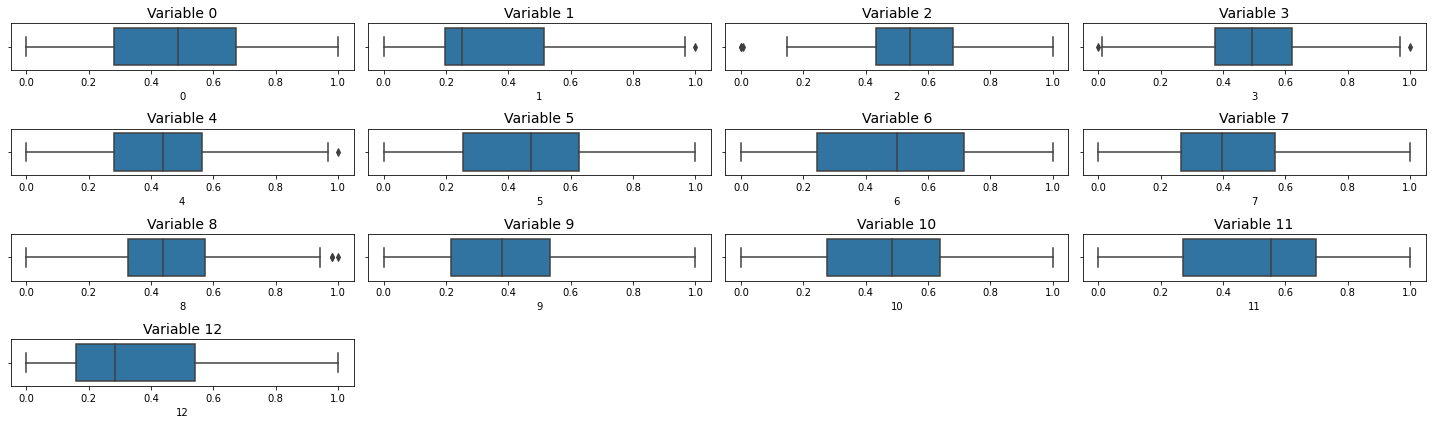

In [25]:
# BoxPlot - valores estadisticos con datos atipicos eliminados y normalizado MinMaxScales
cols = df_mms.drop('objetivo', axis=1)
plt.figure(figsize = (20, 6));
i=1
for var in cols: 
    plt.subplot(4,4,i)
    plt.title('Variable {}'.format(var), size=14)
    sns.boxplot(data=df_mms, x=var)
    plt.tight_layout();
    i+=1

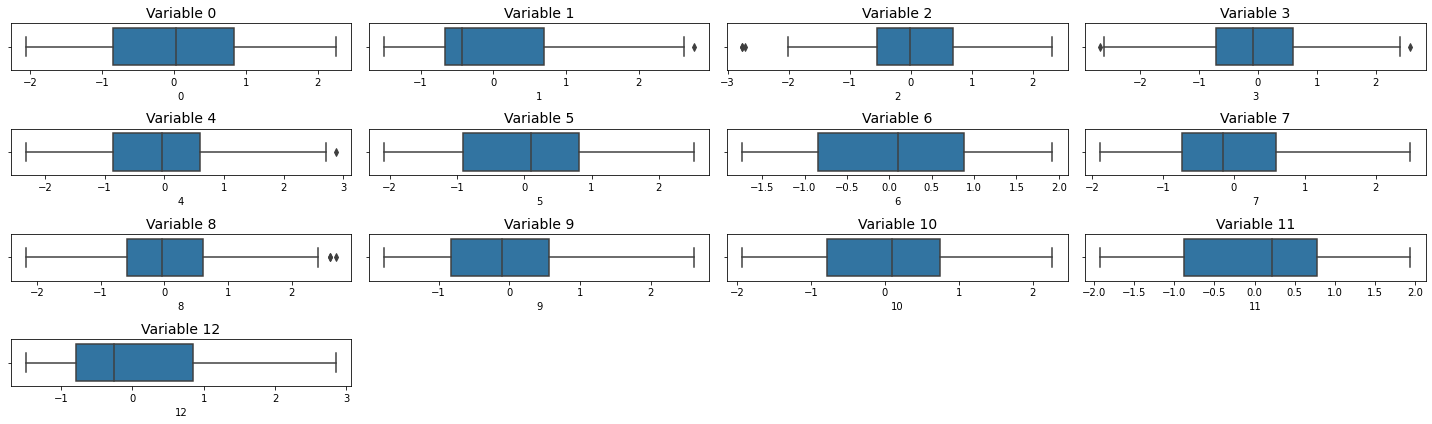

In [26]:
# BoxPlot - valores estadisticos con datos atipicos eliminados y escalado Standard Scaler
cols = df_sscal.drop('objetivo', axis=1)
plt.figure(figsize = (20, 6));
i=1
for var in cols: 
    plt.subplot(4,4,i)
    plt.title('Variable {}'.format(var), size=14)
    sns.boxplot(data=df_sscal, x=var)
    plt.tight_layout();
    i+=1

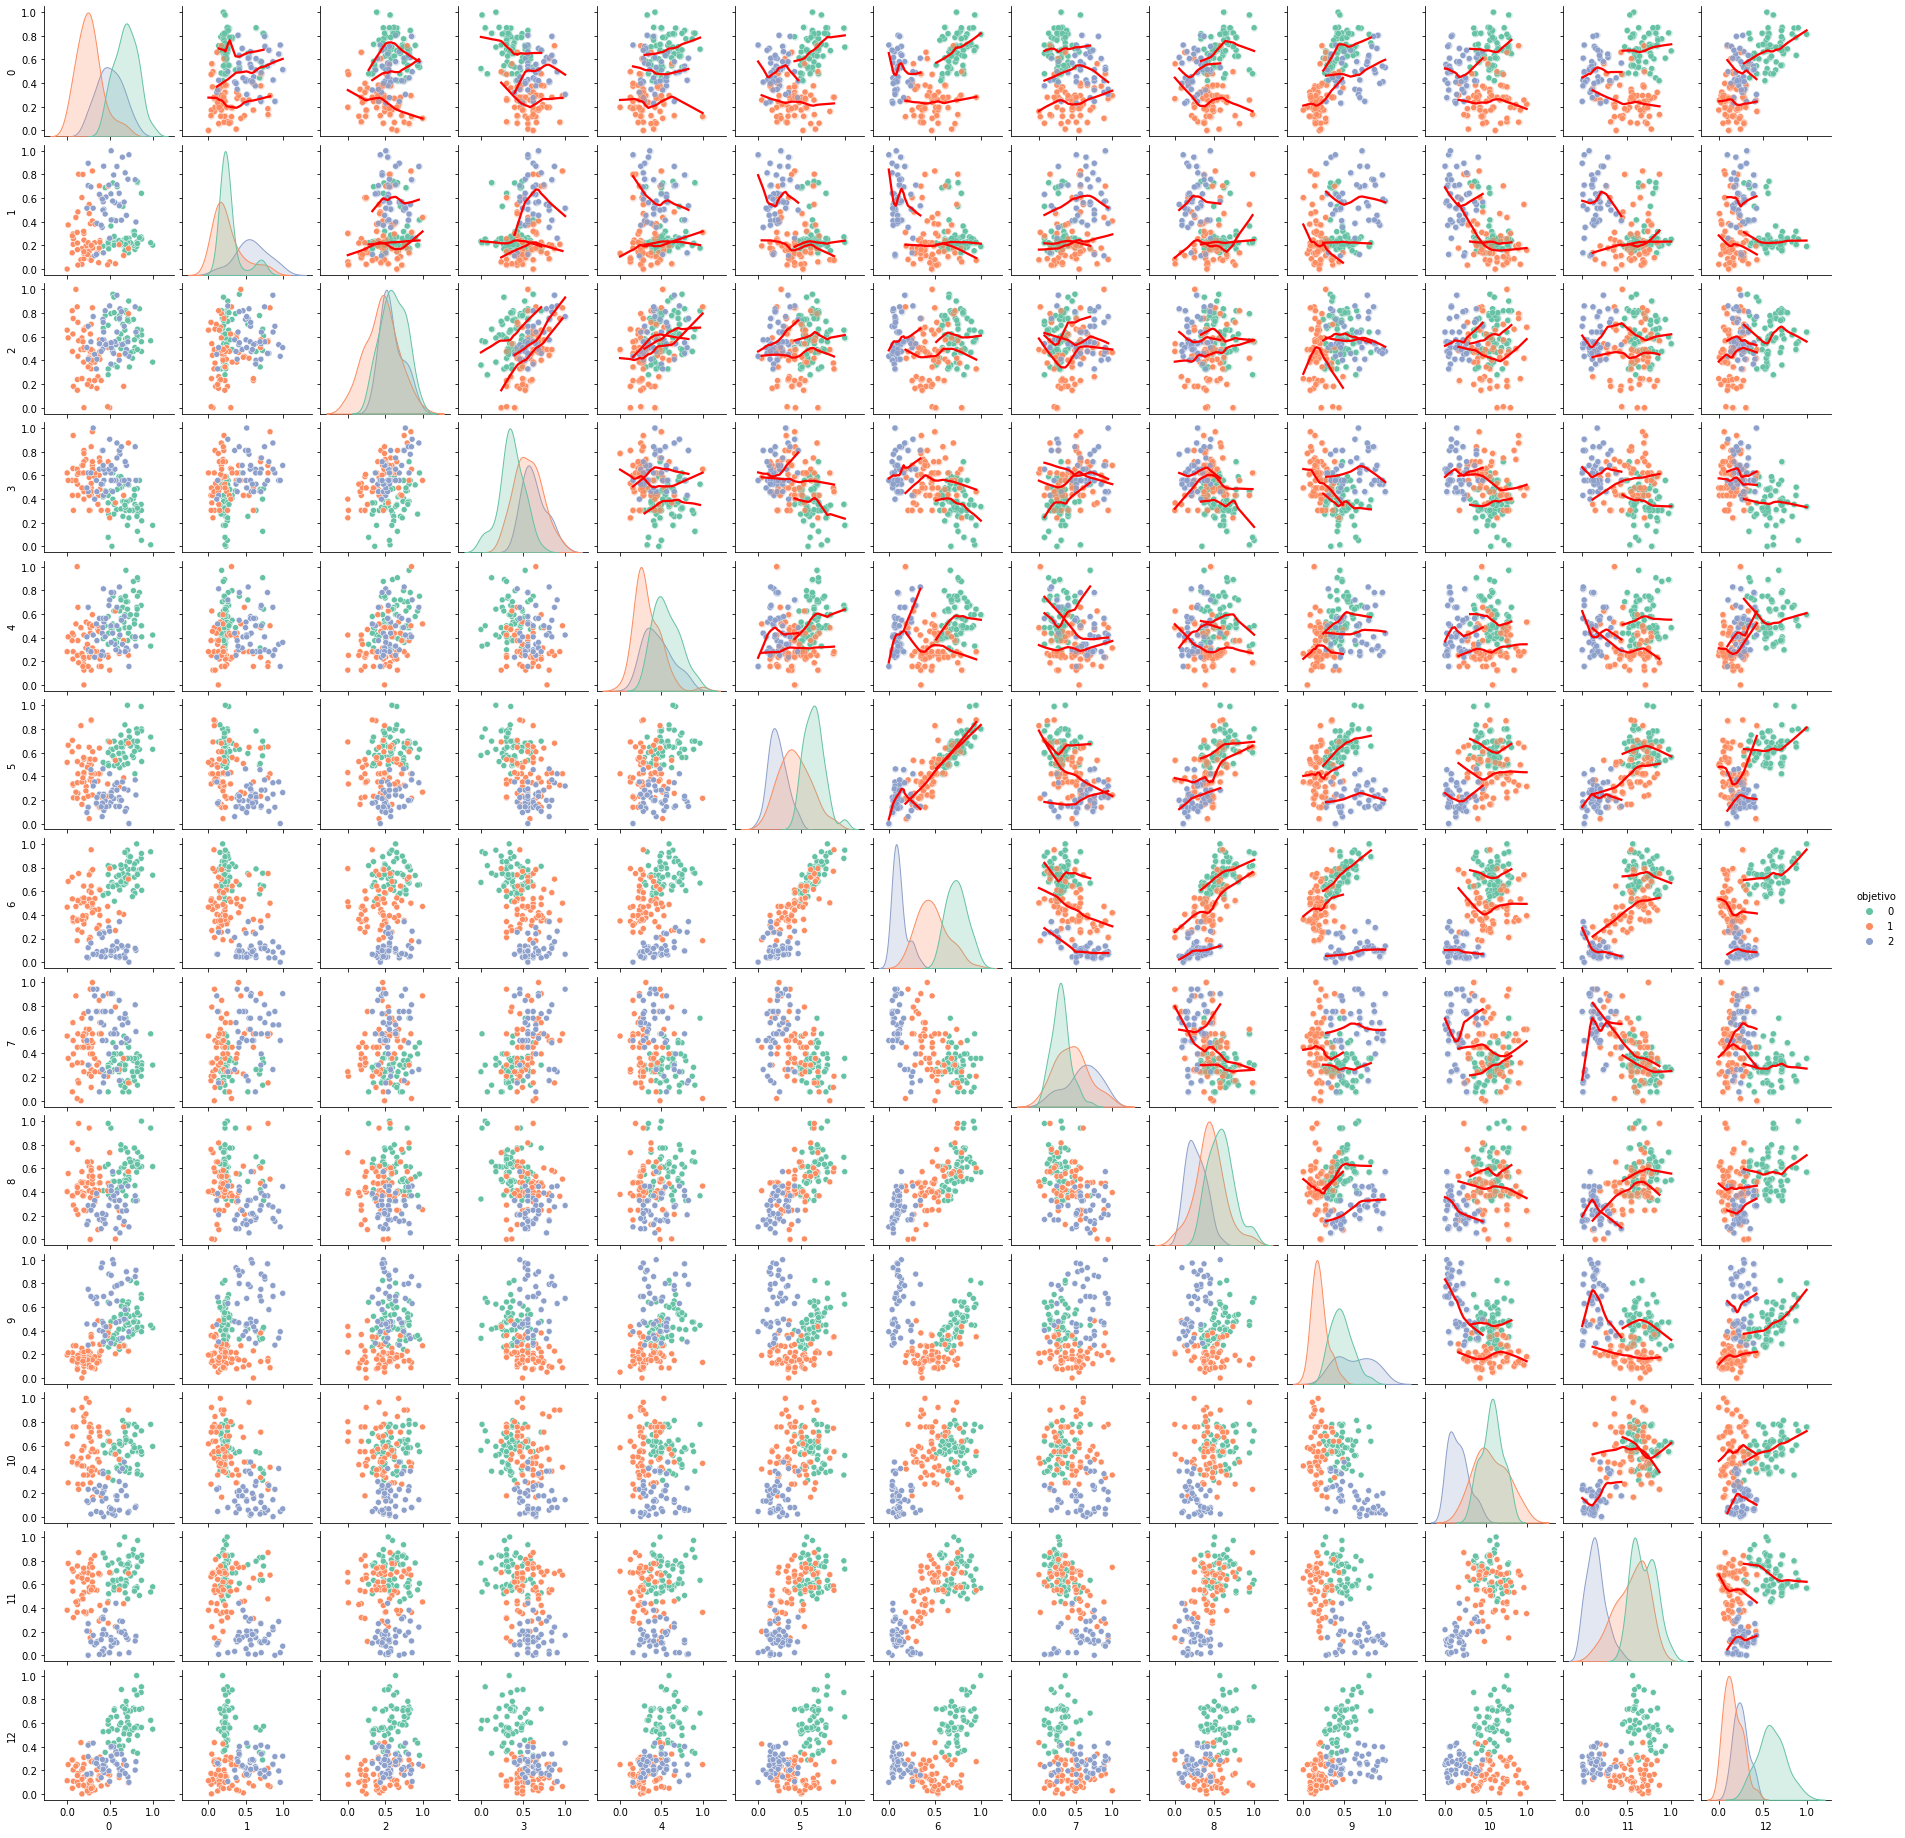

In [27]:
g = sns.pairplot(df_mms, hue='objetivo', palette="Set2", diag_kind="kde", height=2.0);
g = g.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

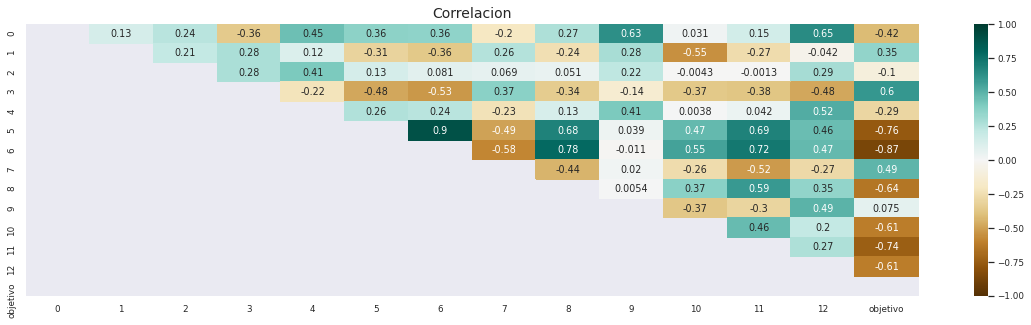

In [28]:
# correlacion
plt.figure(figsize=(20,5))
sns.set(font_scale=0.8)
corr = df_mms.corr(method='spearman')
plt.title('Correlacion', size=14);
mask = np.tril(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap='BrBG', vmin=-1, vmax=1, mask=mask);

In [29]:
pd.DataFrame(corr.stack().reset_index()).tail()

,level_0,level_1,0
191,objetivo,9,0.074521
192,objetivo,10,-0.609413
193,objetivo,11,-0.738901
194,objetivo,12,-0.610186
195,objetivo,objetivo,1.000000


In [30]:
# ordenar correlaciones de la variable objetivo
def tabla_corr(corr_data):
    corr_data = corr_data.stack().reset_index()
    corr_data.columns = ['var1','var2','r']
    corr_data = corr_data.loc[corr_data['var1'] != corr_data['var2'], :]
    corr_data['r_abs'] = np.abs(corr_data['r'])
    corr_data = corr_data.sort_values('r_abs', ascending=False)  
    return(corr_data)

In [31]:
# filtrar correlaciones de la variable objetivo
tablaCorr=tabla_corr(corr)
corrVal=tablaCorr[(tablaCorr['r_abs']>0.5) & (tablaCorr['var1']=='objetivo')].sort_values('r_abs', ascending=False)
corrVal.head()

,var1,var2,r,r_abs
188,objetivo,6,-0.866535,0.866535
187,objetivo,5,-0.762870,0.762870
193,objetivo,11,-0.738901,0.738901
190,objetivo,8,-0.643315,0.643315
194,objetivo,12,-0.610186,0.610186


In [32]:
# Por el momento se ocuparan todas las variables (sin filtro de correlacion)
df_filterCorr=df_mms[corrVal.var2]
df_filterCorr['objetivo']=df_mms['objetivo'].copy()
df_filterCorr.head()

,6,5,11,8,12,10,3,objetivo
0,0.757660,0.627586,0.970696,0.737255,0.561341,0.549451,0.278481,0
1,0.674095,0.575862,0.780220,0.341176,0.550642,0.560440,0.000000,0
2,0.807799,0.627586,0.695971,0.941176,0.646933,0.538462,0.468354,0
3,0.877437,0.989655,0.798535,0.694118,0.857347,0.351648,0.354430,0
4,0.654596,0.627586,0.608059,0.552941,0.325963,0.549451,0.620253,0


# Implementacion del modelo predictivo
## Metodos de clasificacion supervisada

In [33]:
# Clasificadores
clf_logReg = LogisticRegression()
clf_knn = KNeighborsClassifier()
clf_ranFor = RandomForestClassifier(criterion = "entropy")
clf_svc = SVC(kernel='rbf', probability=True)
clf_gbc = GradientBoostingClassifier()
clf_GaussianNB = GaussianNB()
clf_BernoulliNB = BernoulliNB()
clf_MultinomialNB = MultinomialNB()

In [34]:
clasificadores=[clf_logReg, clf_knn, clf_ranFor, clf_svc, clf_gbc, clf_GaussianNB, clf_BernoulliNB]
#clf_MultinomialNB 
clasif=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier',
        'SVC', 'GradientBoostingClassifier', 'GaussianNB', 'BernoulliNB']

In [35]:
# split data
def split_data(datos):
    X_train,X_test, y_train,y_test = train_test_split(
        datos.drop('objetivo', axis=1), datos['objetivo'],
        test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

## Comparacion de clasificadores

In [36]:
rawData=df_outliers.copy()

In [37]:
temp={}
metricas={}
for dt, j in zip([rawData, df_mms, df_sscal], ['rawData','df_mms','df_sscal']):
    X_train, X_test, y_train, y_test = split_data(dt)
    comparacionCLF={"Modelo":[], "f1_score":[], "Accuracy":[], "RMSE":[], "CV_score":[] }
    for i, clf in enumerate(clasificadores):
        comparacionCLF["Modelo"].append(clasif[i])
        clf.fit(X_train, y_train)
        predicciones = clf.predict(X_test)
        #print(confusion_matrix(y_test, predicciones))
        metricas["Report_{}_{}".format(j,clasif[i])]=metrics.classification_report(y_test, predicciones,output_dict=True)
        comparacionCLF["f1_score"].append(f1_score(y_test, predicciones, average='micro'))
        comparacionCLF["Accuracy"].append(metrics.accuracy_score(y_test, predicciones))
        comparacionCLF["RMSE"].append(np.sqrt(mean_squared_error(y_test,predicciones)))
        comparacionCLF["CV_score"].append(cross_val_score(clf, X_test, y_test, cv=10).mean())  
    temp["dfc_{}".format(j)] = comparacionCLF

In [38]:
temp1=pd.DataFrame(temp['dfc_rawData'])[['Modelo']]
temp1.columns = pd.MultiIndex.from_product([["Modelos"], temp1.columns])
temp2=pd.DataFrame(temp['dfc_rawData']).drop('Modelo', axis=1)
temp2.columns = pd.MultiIndex.from_product([["RawData"], temp2.columns])
temp3=pd.DataFrame(temp['dfc_df_mms']).drop('Modelo', axis=1)
temp3.columns = pd.MultiIndex.from_product([["MaxMinScal"], temp3.columns])
temp4=pd.DataFrame(temp['dfc_df_sscal']).drop('Modelo', axis=1)
temp4.columns = pd.MultiIndex.from_product([["StandardScal"], temp4.columns])
evalModelosScaler=pd.concat([temp1,temp2, temp3, temp4], axis=1)
evalModelosScaler

Modelos   RawData                               \
                       Modelo  f1_score  Accuracy      RMSE CV_score   
0          LogisticRegression  0.938776  0.938776  0.247436    0.880   
1        KNeighborsClassifier  0.673469  0.673469  0.755929    0.650   
2      RandomForestClassifier  0.979592  0.979592  0.142857    0.940   
3                         SVC  0.714286  0.714286  0.685119    0.750   
4  GradientBoostingClassifier  0.959184  0.959184  0.202031    0.855   
5                  GaussianNB  0.979592  0.979592  0.142857    0.960   
6                 BernoulliNB  0.387755  0.387755  0.782461    0.385   

  MaxMinScal                              StandardScal                      \
    f1_score  Accuracy      RMSE CV_score     f1_score  Accuracy      RMSE   
0   0.979592  0.979592  0.142857    0.960     0.959184  0.959184  0.202031   
1   0.979592  0.979592  0.142857    0.920     0.979592  0.979592  0.142857   
2   0.979592  0.979592  0.142857    0.960     0.979592  0.979592  0.142857   
3   0.979592  0.979592  0.142857    0.960     0.979592  0.979592  0.142857   
4   0.959184  0.959184  0.202031    0.855     0.959184  0.959184  0.202031   
5   0.979592  0.979592  0.142857    0.960     0.979592  0.979592  0.142857   
6   0.408163  0.408163  1.124858    0.385     0.959184  0.959184  0.202031   

            
  CV_score  
0    0.920  
1    0.920  
2    0.915  
3    0.960  
4    0.875  
5    0.960  
6    0.940

In [39]:
list(metricas.keys())

['Report_rawData_LogisticRegression',
 'Report_rawData_KNeighborsClassifier',
 'Report_rawData_RandomForestClassifier',
 'Report_rawData_SVC',
 'Report_rawData_GradientBoostingClassifier',
 'Report_rawData_GaussianNB',
 'Report_rawData_BernoulliNB',
 'Report_df_mms_LogisticRegression',
 'Report_df_mms_KNeighborsClassifier',
 'Report_df_mms_RandomForestClassifier',
 'Report_df_mms_SVC',
 'Report_df_mms_GradientBoostingClassifier',
 'Report_df_mms_GaussianNB',
 'Report_df_mms_BernoulliNB',
 'Report_df_sscal_LogisticRegression',
 'Report_df_sscal_KNeighborsClassifier',
 'Report_df_sscal_RandomForestClassifier',
 'Report_df_sscal_SVC',
 'Report_df_sscal_GradientBoostingClassifier',
 'Report_df_sscal_GaussianNB',
 'Report_df_sscal_BernoulliNB']

In [40]:
pd.DataFrame(metricas['Report_df_mms_LogisticRegression']).T

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,19.000000
1,1.000000,0.947368,0.972973,19.000000
2,0.916667,1.000000,0.956522,11.000000
accuracy,0.979592,0.979592,0.979592,0.979592
macro avg,0.972222,0.982456,0.976498,49.000000
weighted avg,0.981293,0.979592,0.979760,49.000000
